<h2>Classification of Text into numerical categories [1-40]</h2>
<h4>Using the "Comment" feature to train a model to predict the "Topic" label</h4>

# Loading packages and modules

In [ ]:
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from statistics import mean 
import numpy as np
import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag, tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression 
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils
from sklearn.metrics import accuracy_score,classification_report
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Bidirectional, GRU, Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.python.keras.backend as K 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# to save model state
import pickle
from joblib import dump, load



In [34]:
!pip install pyLDAvis

In [35]:
from __future__ import division, print_function
from gensim import models, corpora
from gensim.test.utils import common_dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape,SpatialDropout1D, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string
import keras
import tensorflow as tf
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from statistics import mean
import numpy as np
import keras
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils
from sklearn.metrics import accuracy_score,classification_report
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Bidirectional, GRU, Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import scipy

import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [36]:
def preprocess_full_text(row):
    text = row['content']
    text= text.lower()
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    text = regex.sub(' ', text)
        
    # remove remaining tokens that are not alphabetic
    text = text.split(' ')
    text = [word for word in text if word.isalpha()]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    stemmer = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()
    stemmed_text = []
    for word in text:
        #stemmed_text.append(stemmer.stem(word))
        stemmed_text.append(lemmatizer.lemmatize(word))
        
    text = " ".join(stemmed_text)
    row['content'] = text
    return(row)

# Feature engineering

In [37]:
def extract_features(training_data,type="counts"):
    """Extract features using different methods"""
  
    if "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, min_df=2, ngram_range=(1, 2), stop_words='english', max_features= 10000,strip_accents='unicode')
        cv.fit_transform(training_data["content"].values)
        train_feature_set=cv.transform(training_data["content"].values)
        
        return train_feature_set
    
    else:    
        
        # TF-IDF BASED FEATURE REPRESENTATION
        cv=TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english', max_features= 10000,strip_accents='unicode', norm='l2')
        
        cv.fit_transform(training_data["content"].values)

        train_feature_set=cv.transform(training_data["content"].values)
        
        return train_feature_set

In [38]:
def machine_learning_models(X,y,model,text_length,type,z=None):
    X = X.apply(preprocess_full_text, axis = 1)
    X = extract_features(X,type=type)
    if z is not None:
        z = z.apply(preprocess_full_text, axis = 1)
        z = extract_features(z,type=type)
    else:
        pass

    if model == 'svm':
        z = support_vm(X,y,z)
    elif model == 'rf':
        z = random_forest(X,y,z)
    elif model == 'logit':
        z = logit(X,y,z)
    elif model == 'xgb':
        z = xgboost(X,y,z)
    elif model == 'cnn':
        z = convo_nn(X,y,z)
    elif model == 'lstm':
        z = LSTmemory(X,y,z)
    elif model == 'dct':
        z = dctree(X,y,z)
    elif model == 'voting':
        z = voting(X,y,z)
    else:
        z = feedforward_net(X,y,z)
        
    return z

# Model Definition and Architecture Implementation

## RF

In [ ]:
def random_forest(X,y,z =None):
    clf = RandomForestClassifier()
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    KFold(n_splits=5, random_state=None, shuffle=False)
    
    temp = 0
    new_clf = RandomForestClassifier()
    
    y.reset_index(drop=True, inplace=True)
    
    #counter = 1
    for train_index, test_index in kf.split(X):                                 # <<< This will run n_splits times, defined above

        X_train, X_test = X[train_index, :], X[test_index, :]
        print(X_test)
        #y_train, y_test = y[train_index], y[test_index]
        y_train, y_test = y.reindex(index=train_index), y.reindex(index=test_index)

        smote_ = SMOTE(random_state=42)                                         # <<< Using SMOTE for random oversampling on train set
        X_train, y_train = smote_.fit_resample(X_train, y_train)
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        clf_report = classification_report(y_test, predictions, output_dict = True)
        
        print(pd.DataFrame(clf_report))

        #dump(clf, f"/content/drive/MyDrive/MSA8150-Machine_Learning/RF_models/RF_v{counter}.joblib")

        #counter += 1

## CNN

In [68]:
def convo_nn(X,y,z =None):
    
    kf = KFold(n_splits=2)
    kf.get_n_splits(X)
    KFold(n_splits=2, random_state=123, shuffle=True)                           

    X = X.toarray()
    X = np.expand_dims(X, axis=-1)
    
    y.reset_index(drop=True, inplace = True)
 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.reindex(index=train_index), y.reindex(index=test_index)

        input = Input(batch_shape=(None, X_train.shape[1], 1))
        drop20 = SpatialDropout1D(0.3)(input)
        conv2 = Conv1D(filters=128, kernel_size=3, activation='relu')(drop20)
        drop21 = Dropout(0.5)(conv2)
        conv22 = Conv1D(filters=64, kernel_size=3, activation='relu')(drop21)
        drop22 = Dropout(0.5)(conv22)
        pool2 = MaxPooling1D(pool_size=2)(drop22)
        flat2 = Flatten()(pool2)
        fc = Dense(128, activation=tf.nn.relu)(flat2)
        out = Dense(1, activation='softmax')(fc)

        model = Model(input, out)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.summary()
        hist = model.fit(X_train, y_train, epochs=10, validation_split=0.15, shuffle=True, batch_size=64)
        predictions = model.predict(X_test, batch_size=64, verbose=1)
        for i in range(len(predictions)):
            if predictions[i] > 0.5:
                predictions[i] = 1
            else:
                predictions[i] = 0
        clf_report = classification_report(y_test, predictions, output_dict = True)
        
        print(pd.DataFrame(clf_report))

## LSTMemory

In [86]:
def LSTmemory(X,y,z =None):
    sess = K.get_session()
    max_features = X.shape[1]
    embedding_dim = 10
    epochs = 5
    batch_size = 100
    nb_classes = 41
    
    kf = KFold(n_splits=2)
    kf.get_n_splits(X)
    KFold(n_splits=2, random_state=123, shuffle=True)

    accuracy=[]
    precision = []
    recall = []
    f1 = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = np_utils.to_categorical(y[train_index], nb_classes), y[test_index]

        model = Sequential()
        model.add(Embedding(max_features, embedding_dim, input_length = X_train.shape[1]))
        model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(41, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),metrics = ['accuracy'])
        print(model.summary())

        X_train = X_train.toarray()
        model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3, min_delta = 0.00001)])
        predictions = model.predict(X_test,batch_size=batch_size)
        clf_report = classification_report(y_test, predictions, output_dict = True)
        
        print(pd.DataFrame(clf_report))

## BERT

In [ ]:
!pip install simpletransformers

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
import logging
import torch
from sklearn.model_selection import train_test_split
stopword_list = stopwords.words('english')
#logging.basicConfig(level=logging.INFO)
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
cuda_available = torch.cuda.is_available()

In [ ]:
def BERT(X):
  data = X
  # randomly sample 80% of th dataframe
  Train = data.sample(frac = 0.80).reset_index(drop=True)
    
  # Creating test dataframe with the remaining 20%
  Test = data.drop(Train.index).reset_index(drop=True)

  train_df = pd.DataFrame(Train[['content','Topic']])
  eval_df = pd.DataFrame(Test[['content','Topic']])

  # Create a ClassificationModel
  model = ClassificationModel(
      "bert", "bert-base-cased", 
      use_cuda = cuda_available,
      num_labels=41,
      args={'num_train_epochs': 3, 'learning_rate': 3e-5, 'output_dir': "/content/drive/MyDrive/MSA8150-Machine_Learning/Saved_Models_2",
            'overwrite_output_dir': True})
  model.args.use_multiprocessing = False
  model.args.use_multiprocessing_for_evaluation = False
  model.args.multiprocessing_chunksize = 1
  model.args.dataloader_num_workers = 1
  
  train_df.dropna(subset=['Topic'], inplace=True)
  eval_df.dropna(subset=['Topic'], inplace=True)

  train_df = train_df.apply(preprocess_full_text, axis = 1)
  eval_df = eval_df.apply(preprocess_full_text, axis = 1)

  # Train the model
  model.train_model(train_df)

  # Evaluate the model
  result, model_outputs, wrong_predictions = model.eval_model(eval_df)  

  print(result)

# Model start

In [40]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
path = "/content/drive/MyDrive/MSA8150-Machine_Learning/Topic Analysis/TA_Training_Set.csv"
df = pd.read_csv(path)

In [46]:
X = df.copy() 

columns = ['Comment', 'Topic']
X = X[columns]
X.rename(columns={'Comment': 'content'}, inplace=True)
X = X.dropna(subset = ['Topic'])
y = X['Topic']


# Data Exploration

In [7]:
# Tokenize each comment to get min/max length, check for null values
df["totalwords"] = df["Comment"].str.split().str.len()

print("Minimum length comment: ", df["totalwords"].min())
print("Maximum length comment: ", df["totalwords"].max())
print("Null values: ", sum(df["Comment"].isna()))

Minimum length comment:  1
Maximum length comment:  1801
Null values:  0


In [ ]:
# Check class balance
print(min(df["Topic"].value_counts()))
print(max(df["Topic"].value_counts()))
df["Topic"].value_counts()

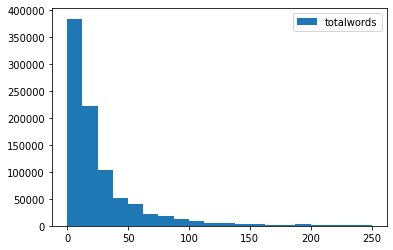

In [29]:
# Length distribution
df["totalwords"].hist(bins=20, range=(0,250), grid=False, legend=True)

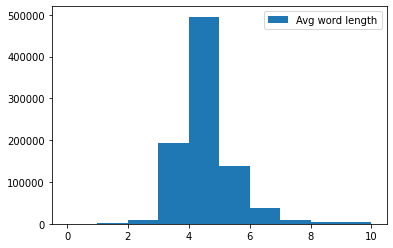

In [31]:
# Average word length
df["Comment"].str.split().apply(lambda comment: [len(word) for word in comment]).map(lambda x: np.mean(x)).hist(range=(0, 10), grid=False) # some outliers not shown in histogram
plt.legend(["Avg word length"])

In [ ]:
# Removing stop words
stop = stopwords.words('english')
df["content"] = df["Comment"].apply(lambda x: [word for word in x.split() if word not in stop])

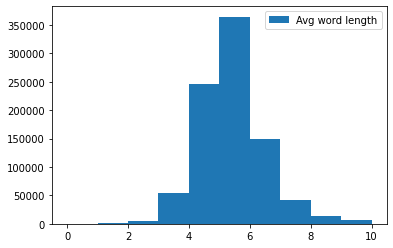

In [40]:
df["content"].apply(lambda comment: [len(word) for word in comment]).map(lambda x: np.mean(x)).hist(range=(0, 10), grid=False) # some outliers not shown in histogram
plt.legend(["Avg word length"])

In [46]:
df_2 = df.loc[:, ["Comment", "Topic"]]
df_2.rename(columns={"Comment": "content"}, inplace=True)
df_2 = df_2.apply(preprocess_full_text, axis=1)

In [50]:
df_2.to_csv("/content/drive/MyDrive/MSA8150-Machine_Learning/Topic Analysis/Preprocessed_data.csv")

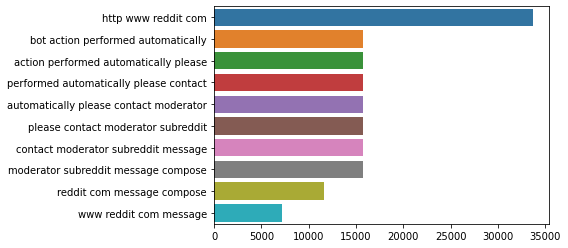

In [51]:
# Generating bar chart showing top 10 4-word combinations
def get_top_ngram(corpus, n=None):
  vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:10]

top_n_bigrams=get_top_ngram(df_2["content"],4)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [65]:
bow_corpus = [common_dictionary.doc2bow(text) for text in df["content"]]

In [66]:
# Using an LDA model to plot the similarity of topics
lda_model = models.LdaMulticore(bow_corpus, 
                                num_topics = 40, 
                                id2word = common_dictionary,                                    
                                passes = 5,
                                workers = 2)


In [71]:
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(lda_model, bow_corpus, common_dictionary, mds="mmds")
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.286666  0.038583       1        1  3.720455
26     0.286663  0.038582       2        1  3.701247
0      0.286684  0.038584       3        1  3.626055
18     0.286676  0.038584       4        1  3.614500
23     0.286665  0.038583       5        1  3.585348
27     0.286674  0.038583       6        1  3.585051
6      0.286679  0.038584       7        1  3.541081
38     0.286668  0.038583       8        1  3.539434
8      0.286668  0.038583       9        1  3.530468
29     0.286674  0.038583      10        1  3.525618
30     0.286657  0.038582      11        1  3.515208
3      0.286672  0.038583      12        1  3.497128
20     0.286677  0.038584      13        1  3.485369
21     0.286676  0.038584      14        1  3.463566
12     0.286680  0.038584      15        1  3.451538
33     0.286680  0.038584      16        1  3.433958
35    -0.136540  0.474589      17        1  3.237921
14    -0.136435  0.474585      18        1  3.157842
34    -0.469660  0.068759      19        1  2.726594
17    -0.469631  0.068754      20        1  2.703564
4      0.166800  0.197208      21        1  2.223296
7      0.067472 -0.503627      22        1  2.175011
9      0.067525 -0.503700      23        1  2.146511
11     0.068377 -0.503679      24        1  2.146055
16     0.113177  0.058316      25        1  1.999351
13    -0.241594 -0.432405      26        1  1.735896
25    -0.241589 -0.432317      27        1  1.715266
2     -0.248042 -0.425355      28        1  1.699493
32    -0.519542 -0.114094      29        1  1.587978
19    -0.352355  0.389435      30        1  1.566542
39    -0.352455  0.389672      31        1  1.539985
5     -0.453516  0.232199      32        1  1.305694
15     0.212234 -0.158808      33        1  1.282950
10    -0.406984 -0.329318      34        1  1.271959
22     0.017893  0.552775      35        1  1.222683
24    -0.449565 -0.214509      36        1  1.190753
28    -0.196426  0.007792      37        1  1.137158
31    -0.196426  0.007792      38        1  1.137158
36    -0.233051  0.070813      39        1  1.137158
37    -0.196426  0.007792      40        1  1.137158, topic_info=        Term          Freq         Total Category  logprob  loglift
6       time  30673.000000  30673.000000  Default  12.0000  12.0000
7       user   3809.000000   3809.000000  Default  11.0000  11.0000
1      human   4102.000000   4102.000000  Default  10.0000  10.0000
5     system   3573.000000   3573.000000  Default   9.0000   9.0000
3   response   2810.000000   2810.000000  Default   8.0000   8.0000
..       ...           ...           ...      ...      ...      ...
3   response     48.476102   2810.736574  Topic40  -2.4849   0.4165
5     system     48.476102   3573.670605  Topic40  -2.4849   0.1764
7       user     48.476102   3809.689120  Topic40  -2.4849   0.1124
1      human     48.476102   4102.989237  Topic40  -2.4849   0.0382
6       time     48.476102  30673.767902  Topic40  -2.4849  -1.9735

[492 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0        30  0.453760  computer
0        31  0.445829  computer
0        37  0.027192  computer
0        38  0.027192  computer
0        39  0.016995  computer
...     ...       ...       ...
7        33  0.085309      user
7        37  0.012599      user
7        38  0.012599      user
7        39  0.007875      user
7        40  0.012599      user

[88 rows x 3 columns], R=12, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 27, 1, 19, 24, 28, 7, 39, 9, 30, 31, 4, 21, 22, 13, 34, 36, 15, 35, 18, 5, 8, 10, 12, 17, 14, 26, 3, 33, 20, 40, 6, 16, 11, 23, 25, 29, 32, 37, 38])

# Predictions

## Machine Learning Models

In [ ]:
machine_learning_models(X,y,'rf',False,type="tfidf")

## Deep Learning Models

In [ ]:
machine_learning_models(X,y,'cnn',False,type="tfidf" )

In [ ]:
machine_learning_models(X,y,'lstm',False,type="tfidf")

## BERT model

In [ ]:
%%time
# training BERT
BERT(X)

In [ ]:
saved_model = ClassificationModel("bert", "/content/drive/MyDrive/MSA8150-Machine_Learning/Saved_Models_2")
saved_model.args.use_multiprocessing = False
saved_model.args.use_multiprocessing_for_evaluation = False
saved_model.args.multiprocessing_chunksize = 1
saved_model.args.dataloader_num_workers = 1

In [ ]:
test_path = "/content/drive/MyDrive/MSA8150-Machine_Learning/Topic Analysis/TA_Training_Set.csv"
df_test = pd.read_csv(test_path)

In [ ]:
%%time
%%capture
# Make predictions with the model
pred_list = []
for comment in df_test["Comment"]:
  predictions, raw_outputs = saved_model.predict([comment])
  pred_list.append(predictions[0])

In [ ]:
sum_ = 0
for ind, topic in enumerate(df_test["Topic"]):
  if topic == pred_list[ind]:
    sum_ += 1
sum_/len(df_test["Comment"])

In [ ]:
#dict_ = {"Topic": pred_list}
#pd.DataFrame.from_dict(dict_).to_csv("/content/drive/MyDrive/MSA8150-Machine_Learning/T.csv", index=False)